In [480]:
import torch
import random
import numpy as np

## Классификация цифр 
Сперва мы сегодня решим задачу классификации: в датасете MNIST хранится много (порядка 60 000 тренировочных и 10 000 проверочных объектов, помеченных на принадлежность одному из десяти классов — какая цифра изображена на картинке) черно-белых картинок 28х28 с рукописными цифрами. Предлагаю нам сегодня реализовать простой классификатор, который бы угадывал цифру по картинке.

In [481]:
from torchvision import datasets
# загружаем датасет MNIST из датасетов доступных в модуле torchvision.dataset 
# (train и test загружаются раздельно)
MNIST_train = datasets.MNIST('./', download=True, train=True)
MNIST_test = datasets.MNIST('./', download=True, train=False)

In [482]:
# Кладем в отдельные массивы с признаками и с метками
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [483]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [484]:
X_train = X_train.float()
X_test = X_test.float()

In [485]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [486]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

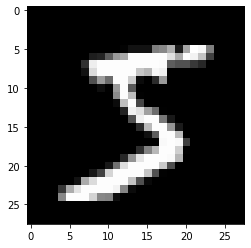

tensor(5)


In [487]:
import matplotlib.pyplot as plt
# выведем пример картинки из датасета

plt.imshow(X_train[0, :, :], cmap='gray')
plt.show()
print(y_train[0])

## Батчи

Обычно данные подаются в модель с помощью **батчей**: загружать в модель по одному экземпляру долго и неэффективно, а если попробовать загрузить все данные разом - они не поместятся в памяти. Поэтому в модель подаются батчи из данных - мы разбиваем данные на куски одинакового размера batch_size и во время обучения поочередно подаем их в модель. Тогда данные (в нашем случае - одноканальные (чернобелые) картинки) подаются в модель с таким размером: (размер батча, ширина картинки, высота картинки).

Поэтому в начале forward мы решейпаем в размерность [-1, 28*28]. Здесь -1 соответствует размеру батча (метод reshape сам посчитает недостающую размерность).

In [488]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons): # задайте свои параметры для инициализации модели
        super(MNISTNet, self).__init__()
        # накидайте сюда слоев!
        # давайте посоревнуемся, у кого получится написать модель которая предсказывает класс 
        # с наибольшей точностью (при запуске кода из предполедней ячейки)
        # можно использовать любые из слоев что мы обсудили: любое количество линейных слоев (torch.nn.Linear),
        # любые слои активации (torch.nn.Sigmoid, torch.nn.ReLU, torch.nn.Tanh)

    
    def forward(self, x):
        x = x.reshape([-1, 28*28])
        # делаем по аналогии с ноутбуком из предыдущей лекции - последовательно применяем слои к x
        # и возвращаем выход модели
        return 
    
mnist_net = MNISTNet(10) # не забудьте добавить свои аргументы

## Работа с GPU

Также давайте впервые попробуем поработать с вычислительными мощностями, которые предоставляет google colab - до этого все вычисления проводились на cpu (центральном процессоре), что занимает сильно больше времени, чем если бы мы полльзовались видеокартой. Чтобы изменить среду выполнения, зайдите в окно "Среда выполнения" и выберите там аппаратный ускоритель GPU.

In [489]:
torch.cuda.is_available()

True

In [490]:
!nvidia-smi

Tue Jul 19 17:12:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |    920MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Чтобы проводить вычисления на видеокарте, нужно перенести все тензоры (с которыми собираемся проводить вычисления) на GPU. Метод torch.Tensor.to() позволяет это делать и переносит тензор на другое устройство (в нашем случае - на GPU). 

In [491]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # проверяем, доступна ли нам видеокарта
                                                                        # если нет, продолжаем работать на cpu
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

Помимо изменения кода для класса MNISTNet, можно менять и другие параметры модели: оптимизатор, размер батча, количество эпох, и т.д...

In [492]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3) 

In [493]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 

        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).cpu().detach().numpy())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy.cpu())
    print(accuracy)

tensor(0.7950, device='cuda:0')
tensor(0.8075, device='cuda:0')
tensor(0.8252, device='cuda:0')
tensor(0.8294, device='cuda:0')
tensor(0.8396, device='cuda:0')
tensor(0.8363, device='cuda:0')
tensor(0.8403, device='cuda:0')
tensor(0.8477, device='cuda:0')
tensor(0.8405, device='cuda:0')
tensor(0.8341, device='cuda:0')


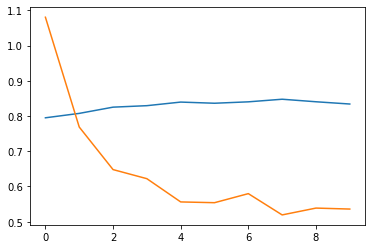

In [494]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history)

То как мы сейчас загрузили данные и подали их на обучение - было правильно, но можно это упростить! Мы попробуем загрузить данные в так называемый dataloader - это итератор, в котором хранится датасет (и признаки (пиксели картинки) и метки (цифра на картинке)). Инициализируя этот класс мы можем с помощью ключа shuffle=True перемешать данные, а аргументом batch_size=10 передать размер батча.

In [495]:
from torchvision import transforms

In [496]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('./', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(),
                                                          ])),
                                           batch_size=100, 
                                           pin_memory=True,
                                           shuffle=True)


In [497]:
mnist_net = MNISTNet(10) # не забудьте добавить свои аргументы
mnist_net = mnist_net.to(device)

test_accuracy_history = []
test_loss_history = []

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3) 

for epoch in range(10):
    for data, label in train_loader:

        data = data.to(device)
        label = label.to(device)
        
        # благодаря даталоадеру можно не разбивать на батчи датасеты
        optimizer.zero_grad()
        preds = mnist_net(data)
        loss_value = loss(preds, label)
        loss_value.backward()
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).cpu().detach().numpy())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy.cpu())
    print(accuracy)

tensor(0.8181, device='cuda:0')
tensor(0.8586, device='cuda:0')
tensor(0.8779, device='cuda:0')
tensor(0.8832, device='cuda:0')
tensor(0.8896, device='cuda:0')
tensor(0.8870, device='cuda:0')
tensor(0.8903, device='cuda:0')
tensor(0.8897, device='cuda:0')
tensor(0.8922, device='cuda:0')
tensor(0.8887, device='cuda:0')


Вы могли заметить что решение с даталоадером работает в разы дольше - возможно это из-за того что приходится обрабатывать 4-мерный массив (размер батча х количество каналов (1) х ширина картинки х высота картинки) вместо 3-мерного. Тем не менее обычно во время обучения используют его и похожих проблем не встречается.

Более того, если датасет обработан криво и требует трансформаций (например, привести все картинки к квадратному виду или одному размеру), даталоадер позволяет через ключ transforms провести необходимые преобразования.